# Const, Preprocessor Directives and Namespaces
___

+ Constants
+ Preprocessor Directives
+ Namespaces



##  Constants

Const is a qualifier that are used in various places:


Best approach is to read it from right to left

### Make a variable a constant identifier

```
int x = 10;
x++;    
```

If we add const to front:

```
const int y = 10;

```
Now the data variable becomes a constant identifier. 

And you **CANNOT** modify the value at all ```y++``` **[NOT ALLOWED]**

```
Error:

cannot assign to variable 'y' with const-qualified type 'const int'
y++;  
~^

variable 'y' declared const here
const int y = 10;
~~~~~~~~~~^~~~~~


```

Remember the data type will still be allocated memory

(

with preprocessor constant, it is preformed before the compilation process (outside compiler)

```
#define y 10

```
This is a **symbolic constant**, whereas the ```const``` is **constant identifier*** [***part of compilation process***]

And this is where you want to use it globally throughtout the program, and applicable through the program

)


### Pointer to a constant datatype [DATA IS CONSTANT]


We have pointer, pointing on variable x (x ==11):

```
int *ptr = &x;
++*ptr;
cout<<*ptr<<endl;
12

```
Change to:

```
const int *ptr1 = &x;

```


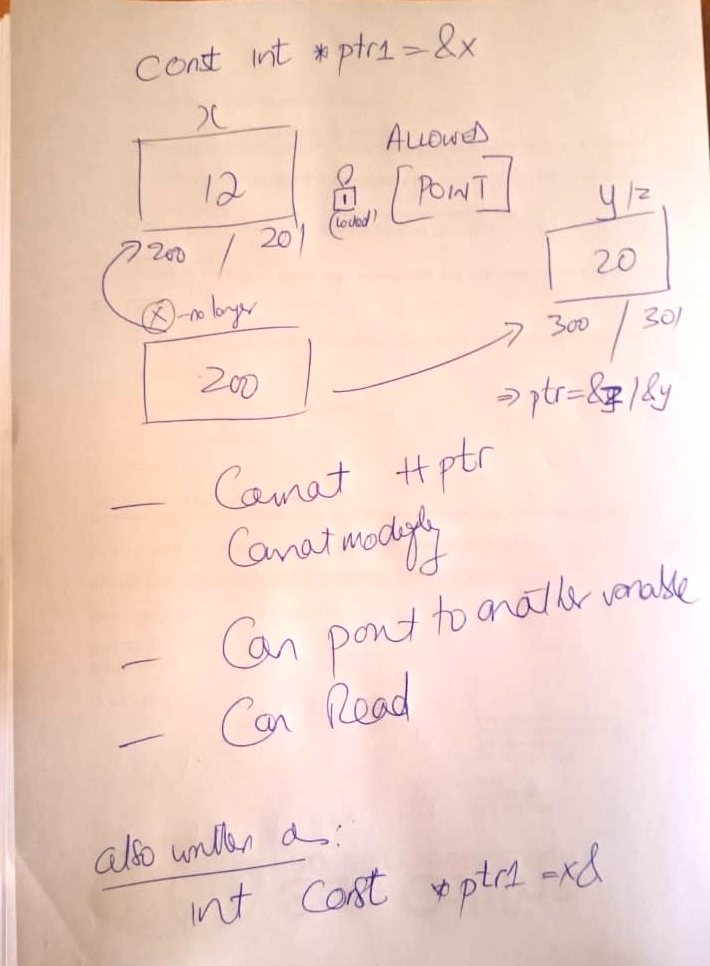



Read as: **```pointer to a constant integer```**

This pointer can read x, but CANNOT modify x, i.e. ```++*ptr1;``` **NOT ALLOWED**. The data is locked

```
Error:

read-only variable is not assignable
++*ptr1;
^ ~~~~~

```

The data is treated as constant.

But it can also be writtem as:

```
int const *ptr1 = &x;

```

But the same pointer ```*ptr``` can still point to another address, i.e:

```
int z = 20;
ptr = &z;

```

So to sum up, pointer to a constant (integer):
1. Can access (point) data from one variable
2. Can access (point) data from another different variable
3. CANNOT modify data from the specified variable


### Pointer to a constant pointer [POINTER IS CONSTANT]

We had:

```
int const *ptr1 = &x;
```

Change to:

```
int *const ptr2 = &x;

```

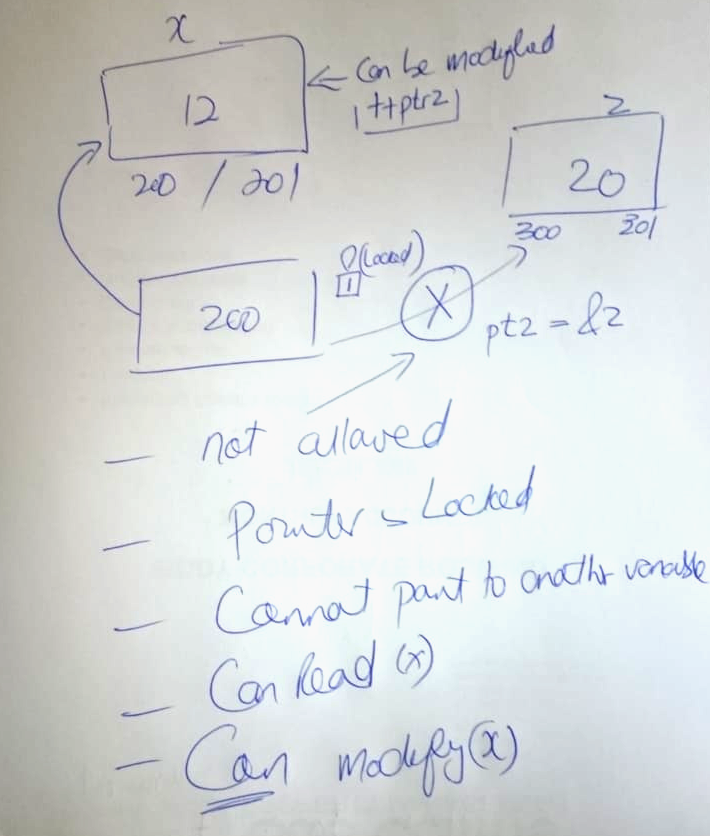

Reading from right to left: **```pointer is constant, and it is a pointer to an integer```**

This is to make the pointer constant:

+ Data is not constant
+ Int is not constant

ptr is constant (or address is constant)

What does it mean? Lets explore...

So if ptr points to x, you CANNOT (as per point 2 above), point it to another variable

**CANNOT:** ```ptr2 = &z;```

```
Error

cannot assign to variable 'ptr2' with const-qualified type 'int *const'
ptr2=&z;
~~~~^

variable 'ptr2' declared const here  
int *const ptr2 = &x;
 ~~~~~~~~~~~^~~~~~~~~
```

Also CANNOT move the pointer along to another 

So to sum up, pointer to a constant (pointer):
1. Can access (point) data from one variable
2. CANNOT access (point) data from another different variable
3. CAN modify data from the specified variable [Data is not locked]

The pointer is constant. Here the pointer is locked, not data.

See:

```
++*ptr2;
cout<<*ptr2<<endl;
13

```
The main idea here is that the pointer is the constant. That is once assigned to data varianle, You can access the data variable value, but cannot use that pointer to point to another data variable. But you can still change the value of the first defined data variable ```++*ptr```. That is allowed.


### Constant pointer to datatype (int) constant [COMBINATION OF ABOVE]

Now both:
1. CANNOT chnage data
2. CANNOT change pointer


Change to (add const):

```
const int *const ptr3 = &x;

```
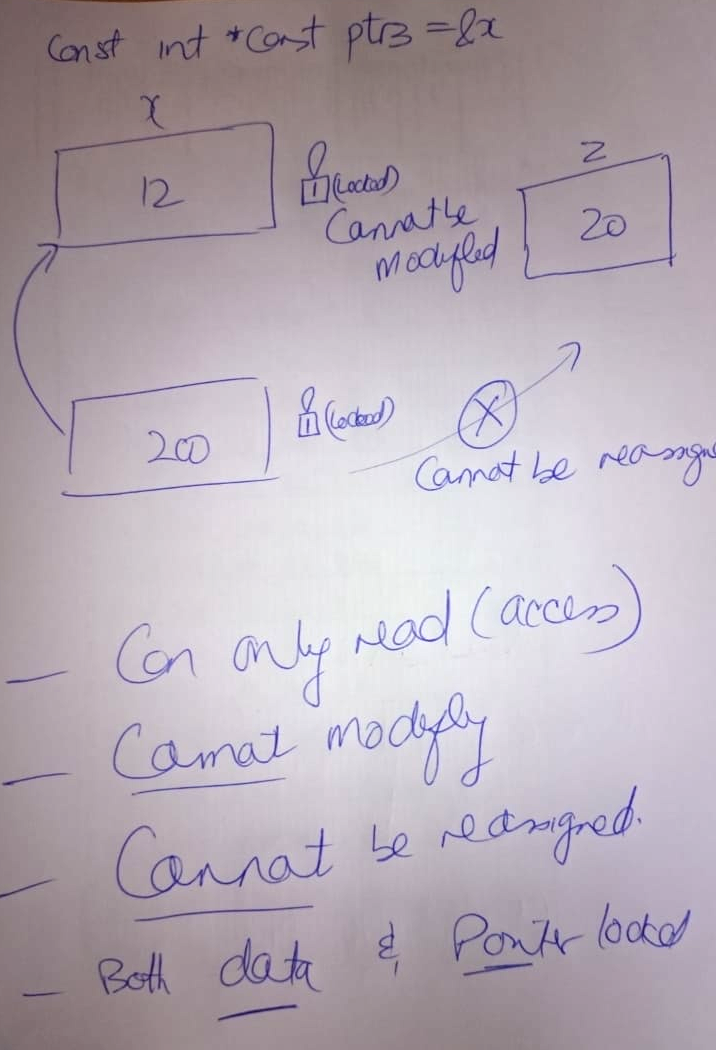


Read: ```pointer is constant,and it is a pointer to integer that is constant```

Data is locked of data variable
Pointer (address) is locked


```
Error - Data is locked
++*ptr3;

read-only variable is not assignable
++*ptr3;
^ ~~~~~
```

```
Error - Pointer is locked (Cannot reassign it to another address

ptr3=&z;

cannot assign to variable 'ptr3' with const-qualified type 'const int *const'
ptr3=&z;
~~~~^
variable 'ptr3' declared const here
const int *const ptr3 = &x;;
~~~~~~~~~~~~~~~~~^~~~~~~~~

```

### Constant keywords after Function name

Where you have a class, and you dont want a member function to update member data variables from within the function. E.g.

We add the word ```const```

```
class Demo{
public:
    int x =10;
    int y =20;
    void Display() const{
        x++;
        cout<<x<<" "<<y<<endl;
    }
}

```

Otherwise we get error, and ```x++``` is **NOT ALLOWED***

```
cannot assign to non-static data member within const member function 'Display'
x++;
~^

member function 'Demo::Display' is declared const here
void Display() const{
~~~~~^~~~~~~~~~~~~~~
```

### Making parameters or arguments to function as constant

We know that call by reference has many benefits, i.t.o memory usage, running in same address space as main, etc.

But we do not have the called function to modify the parameter sent:

Here we modifying it (could be by mistake) ```j++```:

```
void fun(int &j,int &k){

    j++;

    cout<<j<<" "<<k<<endl;

}

int j = 10, k = 20;

fun(j,k);

11 20


```

In order to prevert the function from modifying the parameters, we can add ```const```


```
void fun(const int &j,int &k){

    j++;

    cout<<j<<" "<<k<<endl;

}

cannot assign to variable 'j' with const-qualified type 'const int &'
j++;
~^
variable 'j' declared const here
void fun(const int &j,int &k){
         ~~~~~~~~~~~^
```



In [1]:
#include <iostream>
#include <climits>
#include <math.h>
using namespace std;

In [2]:
int x = 10;
x++;    

In [3]:
const int y = 10;
y++;  

input_line_10:3:2: error: cannot assign to variable 'y' with const-qualified type 'const int'
y++;  
~^
input_line_10:2:12: note: variable 'y' declared const here
 const int y = 10;
 ~~~~~~~~~~^~~~~~


Interpreter Error: 

In [4]:
int *ptr = &x;
++*ptr;

In [5]:
cout<<*ptr<<endl;

12


In [6]:
const int *ptr1 = &x;


In [7]:
++*ptr1;

input_line_14:2:2: error: read-only variable is not assignable
 ++*ptr1;
 ^ ~~~~~


Interpreter Error: 

In [8]:
cout<<*ptr1<<endl;

12


In [9]:
int z = 20;
ptr = &z;

In [10]:
cout<<*ptr<<endl;

20


In [11]:
int *const ptr2 = &x;

In [12]:
ptr2=&z;

input_line_19:2:6: error: cannot assign to variable 'ptr2' with const-qualified type 'int *const'
 ptr2=&z;
 ~~~~^
input_line_18:2:13: note: variable 'ptr2' declared const here
 int *const ptr2 = &x;
 ~~~~~~~~~~~^~~~~~~~~


Interpreter Error: 

In [13]:
++*ptr2;

In [14]:
cout<<*ptr2<<endl;

13


In [15]:
const int *const ptr3 = &x;;

In [16]:
++*ptr3;

input_line_23:2:2: error: read-only variable is not assignable
 ++*ptr3;
 ^ ~~~~~


Interpreter Error: 

In [17]:
ptr3=&z;

input_line_24:2:6: error: cannot assign to variable 'ptr3' with const-qualified type 'const int *const'
 ptr3=&z;
 ~~~~^
input_line_22:2:19: note: variable 'ptr3' declared const here
 const int *const ptr3 = &x;;
 ~~~~~~~~~~~~~~~~~^~~~~~~~~


Interpreter Error: 

In [18]:
class Demo{
public:
    int x =10;
    int y =20;
    void Display() const{
        x++;
        cout<<x<<" "<<y<<endl;
    }
}

input_line_25:6:10: error: cannot assign to non-static data member within const member function 'Display'
        x++;
        ~^
input_line_25:5:10: note: member function 'Demo::Display' is declared const here
    void Display() const{
    ~~~~~^~~~~~~~~~~~~~~


Interpreter Error: 

In [19]:
Demo d;
d.Display();

input_line_26:2:2: error: unknown type name 'Demo'
 Demo d;
 ^


Interpreter Error: 

In [20]:
void fun(const int &j,int &k){
    j++;
    cout<<j<<" "<<k<<endl;
}

input_line_27:2:6: error: cannot assign to variable 'j' with const-qualified type 'const int &'
    j++;
    ~^
input_line_27:1:21: note: variable 'j' declared const here
void fun(const int &j,int &k){
         ~~~~~~~~~~~^
In file included from input_line_1:1:
In file included from /home/chesney/miniconda3/bin/../lib/gcc/x86_64-conda_cos6-linux-gnu/7.3.0/../../../../x86_64-conda_cos6-linux-gnu/include/c++/7.3.0/new:40:
In file included from /home/chesney/miniconda3/bin/../lib/gcc/x86_64-conda_cos6-linux-gnu/7.3.0/../../../../x86_64-conda_cos6-linux-gnu/include/c++/7.3.0/exception:143:
In file included from /home/chesney/miniconda3/bin/../lib/gcc/x86_64-conda_cos6-linux-gnu/7.3.0/../../../../x86_64-conda_cos6-linux-gnu/include/c++/7.3.0/bits/nested_exception.h:40:
In file included from /home/chesney/miniconda3/bin/../lib/gcc/x86_64-conda_cos6-linux-gnu/7.3.0/../../../../x86_64-conda_cos6-linux-gnu/include/c++/7.3.0/bits/move.h:54:
/home/chesney/miniconda3/bin/../lib/gcc/x86_64-conda_co

Interpreter Error: 

In [21]:
int j = 10, k = 20;
fun(j,k);

input_line_28:3:1: error: use of undeclared identifier 'fun'
fun(j,k);
^


Interpreter Error: 